Implementation of Logistic Regression


In [1]:
# import libraries
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [2]:
# reading the csv file, del 2 columns from the file, checking first few rows of the file
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/datasets/BuyComputer.csv")
data.drop(columns=['User ID',],axis=1,inplace=True)
data.tail()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [3]:
#Declaring X as all columns excluding last
X = data.iloc[:,:-1].values

#Declare label as last column in the source file
Y = data.iloc[:,-1].values

In [4]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [5]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=28)
print(X_train.shape)
print(X_test.shape)
# Sacaling data

(300, 2)
(100, 2)


In [6]:
# Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
#Variabes to calculate sigmoid function
y_pred = []
len_x = len(X_train[0])
w = []
b = 0.2
print(len_x)
entries = len(X_train[:,0])

for weights in range(len_x):
    w.append(0)
w

2


[0, 0]

In [9]:
# Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))
#Prediction
def predict(input):
    z = np.dot(input, w) + b
    h= sigmoid(z)
    for i in range(len(h)):
        if(h[i]>=0.5):
            h[i]=1
        else:
            h[i]=0
    return h
    #Loss function
def loss_func(y, y1):
    total_bce_loss = np.sum(-y * np.log(y1) - (1 - y) * np.log(1 - y1))
    m = y.shape[0]
    j = total_bce_loss /m
    return j

In [10]:
dw = []
db = 0
J = 0
alpha = 0.1
for x in range(len_x):
    dw.append(0)

In [11]:
#Repeating the process 300 times
for i in range(300):
    z = np.dot(X_train, w) + b
    y_pred = sigmoid(z)
    l = loss_func(y_pred, y_train)
    dw = np.dot((y_pred-y_train).T, X_train)/X_train.shape[0]
    db = np.mean(y_pred-y_train)
    w = w - alpha * dw
    b = b - alpha* db
    print("Round:",i,"Weight:",w,"Bias:",b)

<ipython-input-9-1622761bf0c7>:16: RuntimeWarning: divide by zero encountered in log
  total_bce_loss = np.sum(-y * np.log(y1) - (1 - y) * np.log(1 - y1))


Round: 0 Weight: [0.03069456 0.01910722] Bias: 0.18234993360208554
Round: 1 Weight: [0.06054473 0.03760655] Bias: 0.16513884285260955
Round: 2 Weight: [0.08957358 0.05551683] Bias: 0.14835927823399458
Round: 3 Weight: [0.11780518 0.07285753] Bias: 0.13200287723885462
Round: 4 Weight: [0.1452643  0.08964854] Bias: 0.1160605212741687
Round: 5 Weight: [0.17197617 0.10590996] Bias: 0.10052248560409181
Round: 6 Weight: [0.1979662  0.12166189] Bias: 0.08537857935391886
Round: 7 Weight: [0.22325975 0.13692426] Bias: 0.07061827356975754
Round: 8 Weight: [0.24788199 0.15171675] Bias: 0.05623081618455358
Round: 9 Weight: [0.27185771 0.16605864] Bias: 0.04220533345388654
Round: 10 Weight: [0.29521123 0.17996869] Bias: 0.028530917986796446
Round: 11 Weight: [0.31796624 0.19346516] Bias: 0.015196703914389785
Round: 12 Weight: [0.3401458  0.20656568] Bias: 0.002191930027629234
Round: 13 Weight: [0.36177223 0.21928724] Bias: -0.010494008104383307
Round: 14 Weight: [0.38286708 0.23164617] Bias: -0.022

In [12]:
#predicting the label
y_pred=predict(X_train)
print(y_pred)

[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]


In [13]:
#print actual and predicted values in a table
print("actual Value\tpredicted values")
for i in range(len(y_test)):
    print(y_test[i],"\t\t",int(y_pred[i]))

actual Value	predicted values
0 		 0
1 		 0
1 		 0
1 		 0
0 		 1
0 		 0
0 		 0
0 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
1 		 1
1 		 0
0 		 1
0 		 0
0 		 1
1 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 0
1 		 0
0 		 0
0 		 0
0 		 0
1 		 1
1 		 1
0 		 1
0 		 0
1 		 0
0 		 0
0 		 0
0 		 0
1 		 0
0 		 1
0 		 0
1 		 0
0 		 0
1 		 0
0 		 0
0 		 0
1 		 0
0 		 0
1 		 0
0 		 0
1 		 1
0 		 1
0 		 0
1 		 0
0 		 0
1 		 0
0 		 1
0 		 1
0 		 0
1 		 0
1 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 1
0 		 1
0 		 0
0 		 0
0 		 1
1 		 1
1 		 0
0 		 0
1 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
1 		 1
0 		 0
0 		 0
0 		 0
0 		 1
1 		 0
0 		 1
1 		 1
0 		 0
0 		 0
1 		 0
1 		 0
1 		 0
0 		 0
0 		 0
1 		 0
0 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
1 		 0


In [14]:
# Calculating accuracy of prediction
acc = np.sum([y_test[i] == (y_pred[i]) for i in range(len(y_test))])/len(y_test)
print("Accuracy:",acc*100,"%")

Accuracy: 60.0 %


#3.1
Using sklearn LogisticRegression model

In [15]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
a = logisticRegr.predict(X_test[0].reshape(1,-1))
a
predictions = logisticRegr.predict(X_test)
print(predictions)
print(y_test)

[0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0]
[0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1]


In [16]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
# target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred))

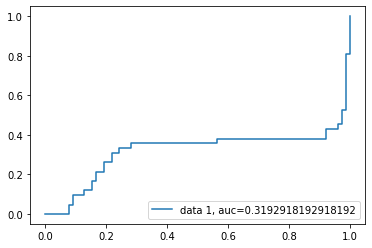

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset,DataLoader
import math
# reading the csv file, del 2 columns from the file, checking first few rows of the file
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/datasets/BuyComputer.csv")
dataset.drop(columns=['User ID',],axis=1,inplace=True)
label = dataset.iloc[:,-1].values
X = dataset.drop("Purchased" ,axis= 1)
# Splitting data
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X,
label, test_size = 0.30, random_state = 28)
# Sacaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

# print(X_Train)
X_Train=torch.from_numpy(X_Train)
y_Train=torch.from_numpy(y_Train)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state = 28)
logisticRegr.fit(X_Train, y_Train)
predictions = logisticRegr.predict(X_Test)
print(predictions)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0]


In [23]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.metrics import  accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Fit
LR.fit(X_train,y_train)

#predicting the test label with LR. Predict always takes X as input
y_test_pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)*100
print("Accuracy: ", accuracy,"%")

Accuracy:  80.0 %


In [24]:
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: [0.83561644 0.7037037 ]
recall: [0.88405797 0.61290323]


In [ ]:
import matplotlib.pyplot as plt
l1=np.array(l1)

In [ ]:
len(l1)
     

In [ ]:
l1

In [26]:
x=np.array(range(0,3000))
x

array([   0,    1,    2, ..., 2997, 2998, 2999])

In [ ]:
plt.plot(x,l1)

In [29]:
hello1=np.array([[28,76000]])
d=np.array(hello1)
d

array([[   28, 76000]])

In [30]:
x_ask=sc.fit(d)
x_ask=x_ask.transform(d)
x_ask

array([[0., 0.]])

In [31]:
LR.predict(x_ask)

array([0])